In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
merged = pd.read_pickle('../dataset/meth_3class.pkl')
merged.head()

,end,cg07881041,cg03513874,cg05451842,cg14797042,cg09838562,cg25458538,cg09261072,cg02404579,cg04118974,...,cg23020486,cg10295858,cg11606463,cg04767756,cg05166473,cg19812938,cg06272054,cg07255356,cg24220897,cg12325588
id,,,,,,,,,,,,,,,,,,,,,
n337,1,0.958538,0.979939,0.013533,0.983516,0.016232,0.973240,0.677887,0.918497,0.643996,...,0.005889,0.951705,0.959841,0.962222,0.904435,0.893996,0.010813,0.013194,0.955439,0.010750
n342,1,0.955460,0.965380,0.017410,0.986156,0.017837,0.970117,0.697211,0.905924,0.617596,...,0.012772,0.955416,0.961274,0.966176,0.871182,0.899968,0.011585,0.012844,0.945449,0.015251
n350,0,0.957872,0.968616,0.012820,0.990030,0.009743,0.975100,0.718051,0.901125,0.593293,...,0.009822,0.950247,0.959483,0.968373,0.873732,0.900965,0.009971,0.013615,0.958734,0.014217
n353,1,0.961997,0.970718,0.025659,0.983666,0.019061,0.970981,0.685835,0.921946,0.623353,...,0.007938,0.946216,0.958511,0.965726,0.881631,0.898304,0.007210,0.009933,0.953894,0.014208
n355,0,0.957528,0.969891,0.017548,0.987591,0.016265,0.971158,0.690440,0.931624,0.647079,...,0.011622,0.955507,0.967023,0.969056,0.856921,0.895616,0.007942,0.013019,0.946188,0.011737


In [3]:
merged = merged.reset_index(drop=False)
merged.head()

,id,end,cg07881041,cg03513874,cg05451842,cg14797042,cg09838562,cg25458538,cg09261072,cg02404579,...,cg23020486,cg10295858,cg11606463,cg04767756,cg05166473,cg19812938,cg06272054,cg07255356,cg24220897,cg12325588
0,n337,1,0.958538,0.979939,0.013533,0.983516,0.016232,0.973240,0.677887,0.918497,...,0.005889,0.951705,0.959841,0.962222,0.904435,0.893996,0.010813,0.013194,0.955439,0.010750
1,n342,1,0.955460,0.965380,0.017410,0.986156,0.017837,0.970117,0.697211,0.905924,...,0.012772,0.955416,0.961274,0.966176,0.871182,0.899968,0.011585,0.012844,0.945449,0.015251
2,n350,0,0.957872,0.968616,0.012820,0.990030,0.009743,0.975100,0.718051,0.901125,...,0.009822,0.950247,0.959483,0.968373,0.873732,0.900965,0.009971,0.013615,0.958734,0.014217
3,n353,1,0.961997,0.970718,0.025659,0.983666,0.019061,0.970981,0.685835,0.921946,...,0.007938,0.946216,0.958511,0.965726,0.881631,0.898304,0.007210,0.009933,0.953894,0.014208
4,n355,0,0.957528,0.969891,0.017548,0.987591,0.016265,0.971158,0.690440,0.931624,...,0.011622,0.955507,0.967023,0.969056,0.856921,0.895616,0.007942,0.013019,0.946188,0.011737


In [4]:
from sklearn.utils import shuffle
#shuffled = shuffle(merged)
#shuffled.to_pickle('../dataset/meth_shuffled_3class.pkl')
shuffled = pd.read_pickle('../dataset/meth_shuffled_3class.pkl')
labels = np.array(shuffled['end'])
features = np.array(shuffled.drop(columns=['end','id']))
print(labels.shape)
print(features.shape)

X = features
Y = labels
print(Y)

(37,)
(37, 729735)
[2 0 0 1 1 0 1 0 0 0 0 0 2 0 0 0 1 1 1 2 0 0 0 1 1 0 0 1 2 1 0 1 1 0 0 1 0]


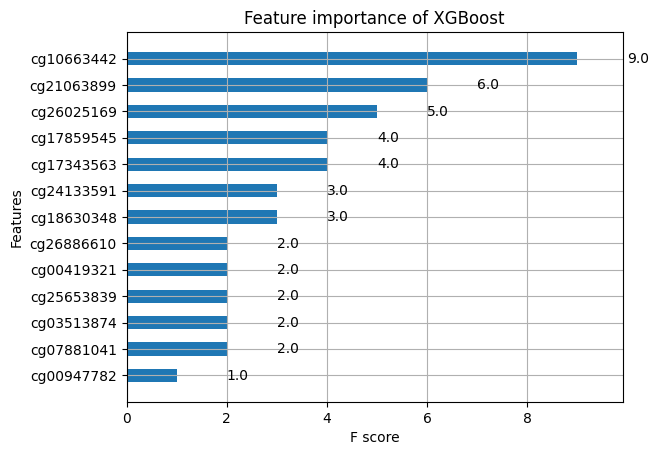

In [5]:
## feature importance
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

# xgboost
model_name='XGBoost'

import xgboost
clf = xgb.XGBClassifier(n_jobs=-1)
clf.fit(X, Y)

feature_names = merged.drop(columns=['end','id']).columns.values.tolist()
clf.get_booster().feature_names = feature_names
xgboost.plot_importance(clf, height=0.5, max_num_features=13)
plt.title('Feature importance of '  + model_name)
plt.savefig('../images/meth3class/feature_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

In [6]:
import lightgbm as lgb
model_name='LightGBM'
feature_names = merged.drop(columns=['end','id']).columns.values.tolist()

params = {
    'task': 'train',
    'boosting_type': 'gbdt',  
    'objective': 'regression',  
    'metric': {'auc'},  
    'num_leaves': 20,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.9,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'verbose': 1  
}

import lightgbm as lgb
train = lgb.Dataset(data=merged.drop(columns=['end','id']),label=merged['end'])
#clf = lgb.LGBMClassifier(n_jobs=-1)
clf = lgb.train(params,train)

ax = lgb.plot_importance(clf, height=0.5, max_num_features=13)
plt.title('Feature importance of '  + model_name)

plt.savefig('../images/meth3class/feature_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 37, number of used features: 0
[LightGBM] [Info] Start training from score 0.567568
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGB

ValueError: not enough values to unpack (expected 2, got 0)

In [7]:
# 2-feature
feature2 = shuffled[['cg10663442','cg21063899','cg26025169','cg17859545','cg17343563','end']]
feature2

,cg10663442,cg21063899,cg26025169,cg17859545,cg17343563,end
12,0.972379,0.972381,0.086948,0.025783,0.144286,2
24,0.979129,0.965276,0.104680,0.025121,0.188793,0
23,0.980928,0.954699,0.109992,0.025433,0.189447,0
34,0.984781,0.956246,0.056367,0.021289,0.142346,1
0,0.983315,0.967464,0.071488,0.021434,0.147520,1
4,0.986989,0.965711,0.101610,0.022524,0.186511,0
7,0.985309,0.969253,0.053565,0.020838,0.156494,1
26,0.987566,0.960909,0.069160,0.019803,0.167938,0
28,0.982386,0.953429,0.071745,0.028623,0.192499,0
18,0.981870,0.966348,0.065185,0.018201,0.150895,0


In [8]:
train = feature2[0:int(0.85*shuffled.shape[0])]
test = feature2[int(0.85*shuffled.shape[0]):]

train_y = np.array(train['end'])
train_x = np.array(train.drop(columns=['end']))
test_y = np.array(test['end'])
test_x = np.array(test.drop(columns=['end']))

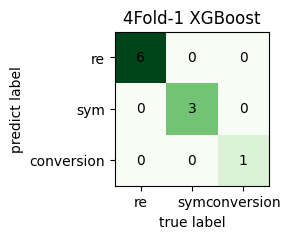

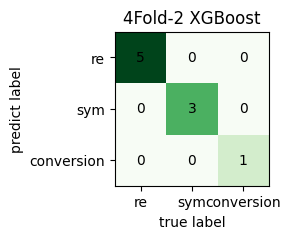

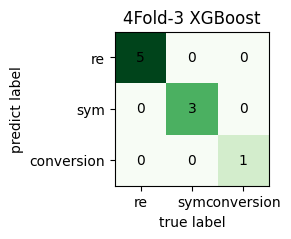

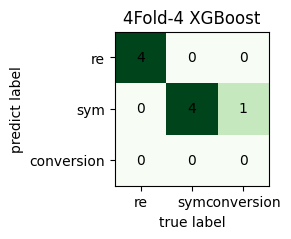

In [9]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# 5-fold
model_name = 'XGBoost'
cv_result = []
cv_label = []
cv = KFold(n_splits=4)
for train_index, valid_index in cv.split(X):
    train_x,test_x = np.array(feature2.drop(columns=['end']))[train_index], np.array(feature2.drop(columns=['end']))[valid_index]
    train_y,test_y = np.array(feature2['end'])[train_index], np.array(feature2['end'])[valid_index]
    #clf = xgb.XGBClassifier(n_jobs=-1,n_estimators=15,max_depth=6)
    clf = xgb.XGBClassifier(n_jobs=-1)
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(4): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    confusion = confusion_matrix(cv_label[i], y_score)

    ax = plt.figure(figsize=(2, 2))
    #ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
    ax = plt.imshow(confusion.T, cmap='Greens')
    indices = range(len(confusion))
    classes = ['re','sym', 'conversion']
    #ax.set_yticklabels(labels=ax.get_yticklabels(), va='center')
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    plt.xlabel("true label")
    plt.ylabel("predict label")
    plt.title('4Fold-' + str(i+1) + ' ' + model_name)
    for first_index in range(len(confusion)):
        for second_index in range(len(confusion[first_index])):
            plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
            #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
    
    plt.savefig('../images/meth3class/4Fold-' + str(i+1) + '-' + model_name + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()

In [10]:
feature2.to_csv('../dataset/meth_3class_feature5.csv')